<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-06-03-KMeans/April_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = px.data.iris()

df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
87,6.3,2.3,4.4,1.3,versicolor,2
86,6.7,3.1,4.7,1.5,versicolor,2
24,4.8,3.4,1.9,0.2,setosa,1
33,5.5,4.2,1.4,0.2,setosa,1


Text(0, 0.5, 'petal_width')

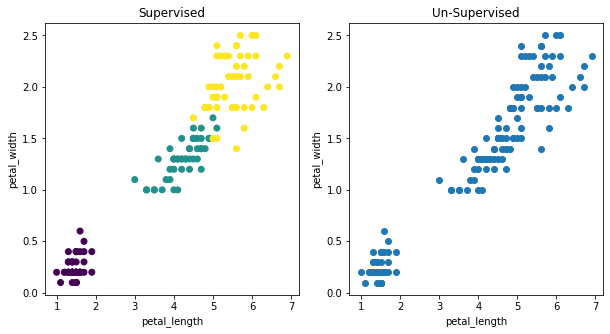

In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plt.title('Supervised')
plt.scatter(df['petal_length'], df['petal_width'], c=df['species_id'])

plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.subplot(1, 2, 2)
plt.title('Un-Supervised')
plt.scatter(df['petal_length'], df['petal_width'])

plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [4]:
from sklearn.cluster import KMeans

X = df[ ['petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [5]:
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

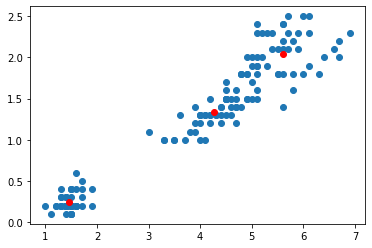

In [6]:
plt.scatter(X['petal_length'], X['petal_width'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red')

plt.show()

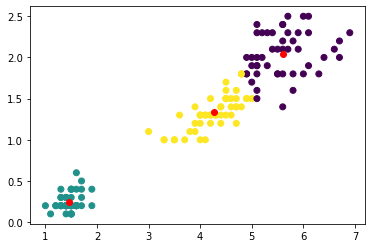

In [7]:
plt.scatter(X['petal_length'], X['petal_width'], c=kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red')

plt.show()

In [8]:
kmeans.inertia_

31.38775897435897

In [9]:

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

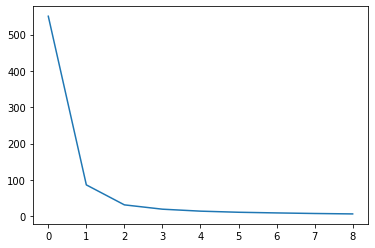

In [10]:
plt.plot(inertia)

In [11]:
from sklearn.metrics import silhouette_score


inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.predict(X))
    inertia.append(score)

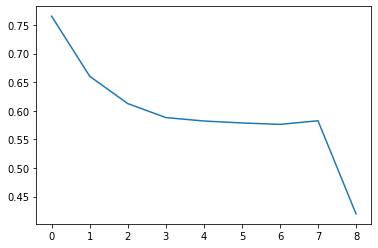

In [12]:
plt.plot(inertia)

# Semi-Supervised

In [13]:
from sklearn.datasets import fetch_openml
import numpy as np

In [14]:
dataset = fetch_openml('mnist_784', version=1)

In [15]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
X = dataset.data.values
y = np.array(dataset.target)

In [17]:
X.shape, y.shape

((70000, 784), (70000,))

In [21]:
SEED=90

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=SEED, test_size=0.5)

In [22]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50

model = LogisticRegression(random_state=SEED).fit(xtrain[:n_labeled], ytrain[:n_labeled])
model.score(xtest, ytest)

0.6328571428571429

In [23]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k, random_state=SEED)
X_digits_dist = kmeans.fit_transform(xtrain)

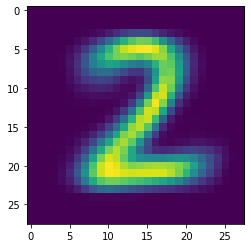

2


In [24]:
from IPython.display import clear_output

ytrain = np.ones(k)

for i in range(k):
    img = kmeans.cluster_centers_[i].reshape(28, 28)
    clear_output(wait=True)
    plt.imshow(img)
    plt.show()
    ytrain[i] = int(input())

```
ytrain = array([1., 7., 6., 0., 5., 1., 9., 3., 5., 0., 2., 0., 6., 8., 3., 9., 3.,
       1., 8., 0., 4., 9., 8., 6., 5., 4., 4., 1., 6., 0., 6., 9., 7., 2.,
       3., 7., 6., 3., 5., 7., 8., 4., 3., 2., 7., 2., 0., 4., 0., 2.])
```

In [27]:
model = LogisticRegression(random_state=SEED).fit(kmeans.cluster_centers_, ytrain)
model.score(xtest, ytest)

0.0

In [31]:
model.score(xtest, ytest.astype('int8'))

0.7681142857142857